In [83]:
import pySPM
import numpy as np
import matplotlib.pyplot as plt
import peakutils as pk
import skimage
from scipy.signal import savgol_filter

In [76]:
afmdir = '/users/zatterin/Documents/data/AFM/kto_pto/'
d = 'e16095/11.11.16/'
%ls {afmdir+d}

e16095.001  e16095.005  e16095.007   NsThumbnails.bin
e16095.003  e16095.006  missing.png


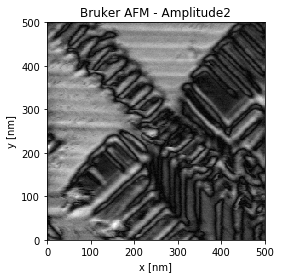

In [77]:
fname = afmdir+d+'e16095.001'
a = pySPM.Bruker(fname)
# a.list_channels()
la = a.get_channel(channel='Amplitude2',backward=True)
la.show()

In [78]:
a.list_channels()

Channels
	S [ZSensor] "Height Sensor"
	S [DeflectionError] "Deflection Error"
	S [AmplitudeActual] "Amplitude1"
	S [Phase] "Phase1"
	S [LockIn2AmpInput] "Amplitude2"
	S [LockIn2PhaseInput] "Phase2"


In [79]:
la = a.get_channel(channel='Amplitude2',backward=True).pixels
va = a.get_channel(channel='Amplitude1',backward=True).pixels
vp = a.get_channel(channel='Phase1',backward=True).pixels
lp = a.get_channel(channel='Phase2',backward=True).pixels
ls = [va, la, vp, lp]

In [101]:
pixres = 500/256
print(pixres) # in nm

1.953125


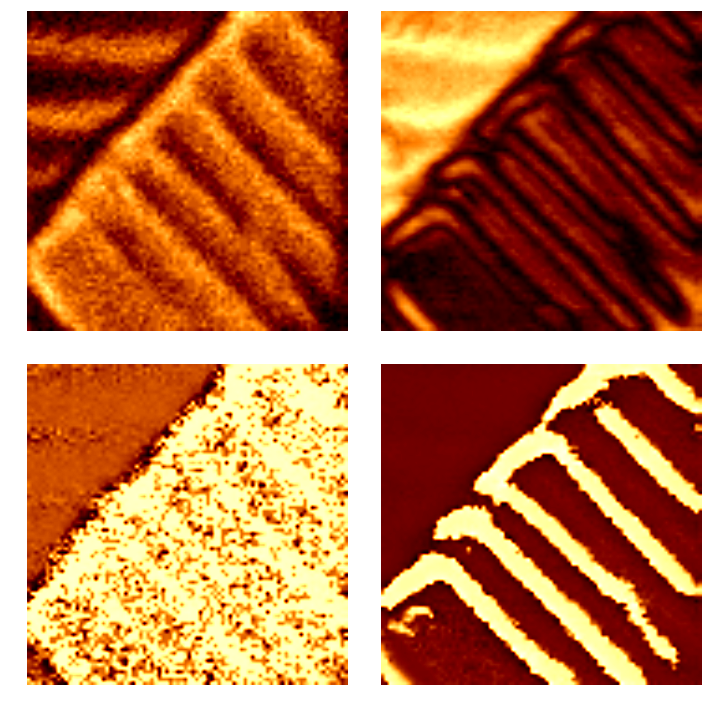

In [135]:
nmscale = np.linspace(0,pixres*50,50)

fig, ax = plt.subplots(2,2,figsize=(10,10))
a = ax.ravel()

for axis, img in zip(a, ls):
    img = np.flipud(img[170:,170:])
    axis.imshow(img,cmap='afmhot',vmax=img.max()+img.mean()/2, interpolation='bilinear')#,
                #extent=[nmscale.min(), nmscale.max(),nmscale.min(), nmscale.max()])
    axis.axis('off')
    plt.tight_layout()